In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit

In [2]:
def load_object_from_pkl(filename):
    """
    Load an object from a .pkl file using pickle.
    
    Parameters:
        filename (str): The name of the .pkl file.
    
    Returns:
        object: The loaded object from the .pkl file.
    """
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    print(f"Object loaded from {filename}")
    return obj

In [3]:
data_emission_long = load_object_from_pkl("full_sim_data/n10/blackman/length_vst_1/emission_list.pkl")
data_emission_short = load_object_from_pkl("full_sim_data/n10/blackman/length_vst_0.5/emission_list.pkl")

print(data_emission_short)
print(data_emission_long)

Object loaded from full_sim_data/n10/blackman/length_vst_1/emission_list.pkl
Object loaded from full_sim_data/n10/blackman/length_vst_0.5/emission_list.pkl
[[(0.0017353743473787664, 0.4135735440785079), (0.06252060879433595, 0.42289137488173495)], [(0.021593595671860595, 0.35896096687618895), (0.11628161634119391, 0.3933502524792335)], [(0.005922488803593818, 0.3404431213845314), (0.0721725961912857, 0.35571927204703413)], [(0.01875688632083821, 0.3483446134270993), (0.0943220416296426, 0.3769025220231435)], [(0.015986446254766872, 0.3048063786714408), (0.09302463940655342, 0.3324088104958418)], [(0.021607108447519337, 0.3272186472327545), (0.10424462748110985, 0.35983250478954565)], [(0.020097411606894898, 0.287959297139404), (0.10217259608590173, 0.3207488497341867)], [(0.023634930593799255, 0.3150776329328396), (0.10979251534853829, 0.350331623783753)], [(0.021893314553719526, 0.2794788353002307), (0.10666695420924029, 0.31461969124918837)], [(0.02487810400321886, 0.3083027446479165

In [4]:
em_x_long = []
em_y_long = []

em_x_short = []
em_y_short = []

for data in data_emission_long:
    em_x_long.append(data[0][0]+data[1][0])
    em_y_long.append(data[0][1]+data[1][1])

for data in data_emission_short:
    em_x_short.append(data[0][0]+data[1][0])
    em_y_short.append(data[0][1]+data[1][1])

def n_time(n, vst_length):
    return ((4+(n)*(0.5+2*vst_length)*10**-6))

def n_success(n, long=False,losses=True):
    photon_prob=1
    if losses:
        detection=0.95
        optical_losses=1-0.1955
    else:
        detection=1
        optical_losses=1

    if long:
        em_list=em_y_long
    else:
        em_list=em_y_short

    for i in range(int(n)):
        photon_prob*=em_list[i]*detection*optical_losses

    return photon_prob

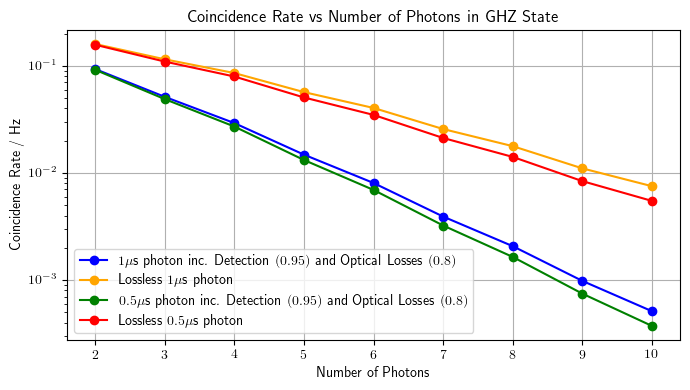

In [5]:
plt.rcParams['text.usetex'] = True
n_list=np.arange(2,11,1)
n_list_interp=np.arange(10,20,1)
rate_list_lossy_long=[]
rate_list_lossless_long=[]

rate_list_lossy_short=[]
rate_list_lossless_short=[]
for i in range(int(len((n_list)))):
    rate_list_lossy_long.append(n_success(n_list[i], long=True)/n_time(n_list[i],1))
    rate_list_lossless_long.append(n_success(n_list[i], long=True, losses=False)/n_time(n_list[i],1))

    rate_list_lossy_short.append(n_success(n_list[i], long=False)/n_time(n_list[i],0.5))
    rate_list_lossless_short.append(n_success(n_list[i], long=False, losses=False)/n_time(n_list[i],0.5))


# Define the exponential function
def exponential_func(x, a, b,c):
    return a * np.exp(b * x+c)

# Fit the exponential function to both datasets
params_lossless_long, covariance_lossless_long = curve_fit(exponential_func, n_list, rate_list_lossless_long, p0=[1, 1,1])
params_lossy_long, covariance_lossy_long = curve_fit(exponential_func, n_list, rate_list_lossy_long, p0=[1, 1,1])

params_lossless_short, covariance_lossless_short = curve_fit(exponential_func, n_list, rate_list_lossless_short, p0=[1, 1,1])
params_lossy_short, covariance_lossy_short = curve_fit(exponential_func, n_list, rate_list_lossy_short, p0=[1, 1,1])


# Extract the parameters
a_l, b_l, c_l = params_lossless_long
a, b, c = params_lossy_long

a_l_s, b_l_s, c_l_s = params_lossless_short
a_s, b_s, c_s = params_lossy_short

# Generate the fitted curve
fit_line_lossless_long = exponential_func(n_list_interp, a_l, b_l, c_l)
fit_line_lossy_long = exponential_func(n_list_interp, a, b, c)

fit_line_lossless_short = exponential_func(n_list_interp, a_l_s, b_l_s, c_l_s)
fit_line_lossy_short = exponential_func(n_list_interp, a_s, b_s, c_s)


fig, ax = plt.subplots(figsize=(7,4))
ax.semilogy(n_list,rate_list_lossy_long, label="$1\mu$s photon inc. Detection $(0.95)$ and Optical Losses $(0.8)$", color="blue", marker='o')
#ax.semilogy(n_list_interp,fit_line_lossy_long, linestyle="--", label="Fit to Lossy", color="blue")
ax.semilogy(n_list,rate_list_lossless_long, label="Lossless $1\mu$s photon", color="orange", marker='o')
#ax.semilogy(n_list_interp,fit_line_lossless_long, linestyle="--", label="Fit to Lossless", color="orange")
ax.semilogy(n_list,rate_list_lossy_short, label="$0.5\mu$s photon inc. Detection $(0.95)$ and Optical Losses $(0.8)$", color="green", marker='o')
#ax.semilogy(n_list_interp,fit_line_lossy_short, linestyle="--", label="Fit to Lossy", color="green")
ax.semilogy(n_list,rate_list_lossless_short, label="Lossless $0.5\mu$s photon", color="red", marker='o')
#ax.semilogy(n_list_interp,fit_line_lossless_short, linestyle="--", label="Fit to Lossless", color="red")

ax.set_xlabel("Number of Photons")
ax.set_ylabel("Coincidence Rate / Hz")
ax.set_title("Coincidence Rate vs Number of Photons in GHZ State")
ax.legend()

fig.tight_layout()
plt.grid(True)
fig.savefig("pdf_figs/ghz_coincidence_rate.pdf")



/Users/janoleernst/anaconda3/envs/rb_photon_prod/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NameError: name 'rate_list_lossy' is not defined

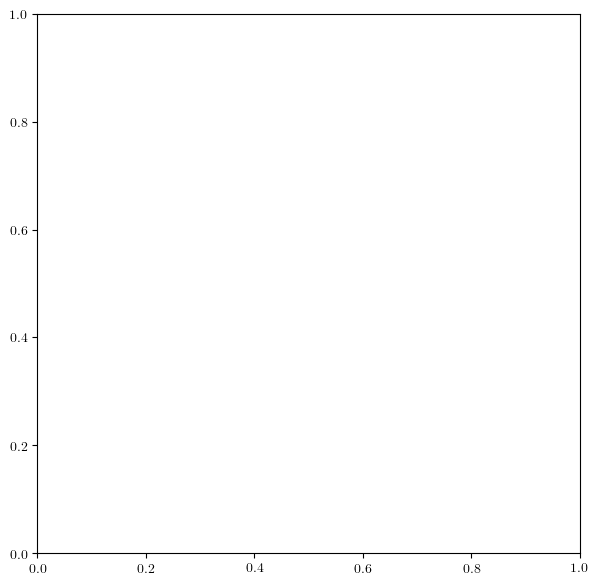

In [6]:
rempe_data_set=[[1,8744842], [2,3753054], [3,1637258], [4,717938], [5,313846], [6,138316], [7,60710], [8,26632], [9,11598], [10,5134], [11,2242], [12,991], [13,442], [14,151]]
lossy_data_rempe=[]
for i, el in enumerate(rempe_data_set):
    lossy_data_rempe.append(0.66**i*el[1]/3600)

qd_data=np.array([7*10**(2),6,6.5*10**(-2)])
qd_n_ph=np.array([3,4,5])
qd_interp=np.array([3,4,5])

spdc_data=1/(24*3600)
spdc_ph=12

rydberg_data=7*10**(-3)
rydberg_ph=6

# Fit the exponential function to the data
params_qd, covariance_qd = curve_fit(exponential_func, qd_n_ph, qd_data, p0=[1,1,1])

# Extract the parameters
a_qd, b_qd, c_qd = params_qd

# Generate the fitted curve
fit_line_qd = exponential_func(qd_interp, a_qd, b_qd, c_qd)

fig, ax = plt.subplots(figsize=(7,7))
ax.semilogy(n_list,rate_list_lossy, label="This work with losses", color="blue", marker='o', markersize=12)
ax.semilogy(n_list_interp,fit_line_lossy, color="blue")
ax.semilogy(n_list,rate_list_lossless, color="orange" , label="This work without losses")
ax.semilogy(n_list_interp,fit_line_lossless, color="orange")
ax.semilogy([i[0] for i in rempe_data_set], lossy_data_rempe, label="Rb CQED [2022]", color="red", marker='o', markersize=12)
ax.semilogy([i[0] for i in rempe_data_set], [i[1]/3600 for i in rempe_data_set], label="Rb CQED [2022] no losses")
ax.semilogy(qd_n_ph, qd_data, label="QD [2020]", color="green", marker='s', markersize=12)
#ax.semilogy(qd_interp, fit_line_qd, color="green")
ax.semilogy(spdc_ph, spdc_data, label="SPDC [2018]", color="purple", marker='v', markersize=12)
ax.semilogy(rydberg_ph, rydberg_data, label="Rydberg [2021]", color="black", marker='p', markersize=12)

ax.set_xlabel("Number of Photons", fontsize=16)
ax.set_ylabel("Coincidence Rate / Hz", fontsize=16)
ax.set_title("Coincidence Rate vs Number of Photons in GHZ State", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend()

fig.tight_layout()
plt.grid(True)
fig.savefig("pdf_figs/ghz_coincidence_rate_comp.pdf")